In [1]:
#Importando bibliotecas
import numpy as np
import pandas as pd
from matplotlib import rcParams
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 1000)
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
#Fazendo configurações básicas das bibliotecas
%matplotlib inline
pd.set_option("display.max_columns", None)
rcParams['figure.figsize'] = 15,10
sns.set_style('whitegrid')

In [3]:
#Importando os dados csv
drogas_entrada = pd.read_csv('Dados/resultado_drogas.csv', encoding = 'latin-1', sep = ';', index_col=0, low_memory=False)
drogas_entrada.shape

(113231, 13)

In [4]:
#Definindo o DataFrame drogas com apenas as colunas a serem analisadas:
#X: Cor Predominante, Descrição e Tipo de Embalagem;
#Y: RECLASSIFICAÇÃO
drogas = drogas_entrada[['Cor Predominante','Descrição', 'Tipo de Embalagem','RECLASSIFICAÇÃO']]

In [5]:
#Criando o DataFrame sem_nan, a partir do dataframe drogas,
#Sem dados NaN na descrição.
sem_nan = drogas.loc[drogas['Descrição'].notna()]

In [6]:
#Removendo dados duplicados
sem_nan = sem_nan.drop_duplicates()

In [7]:
sem_nan

,Cor Predominante,Descrição,Tipo de Embalagem,RECLASSIFICAÇÃO
CHAVE_OBJETO,,,,
19903932,Verde,uma pequena porção de erva de cor esverdeada s...,Porção(es),Maconha
19904961,Branco,substancia semelhanta a crack,Porção(es),Crack
19904971,Branco,substancia semelhante a cocaina,Porção(es),Cocaína
19906420,Verde,aproximadamente sete gramas,Tijolo(s),Drogas
19906441,Amarelo,aproximadamente sete gramas,Unidade(s),Drogas
...,...,...,...,...
24126895,Verde,"UMA PORÇÃO DE MACONHA, PESANDO APROXIMADAMENTE...",Porção(es),Maconha
24126925,Branco,102 PINOS DE COCAÍNA,Porção(es),Cocaína
24126984,Branco,aproximadamente 23 gramas de pinos de cocaína,Unidade(s),Cocaína


In [8]:
#Separando os tipos de drogas em DataFrames específicos para...
# posteriormente serem concatenados em um único DataFrame balanceado 
maconha = sem_nan.loc[sem_nan['RECLASSIFICAÇÃO'] == 'Maconha']
crack = sem_nan.loc[sem_nan['RECLASSIFICAÇÃO'] == 'Crack']
cocaina = sem_nan.loc[sem_nan['RECLASSIFICAÇÃO'] == 'Cocaína']
drogas = sem_nan.loc[sem_nan['RECLASSIFICAÇÃO'] == 'Drogas']

In [9]:
maconha

,Cor Predominante,Descrição,Tipo de Embalagem,RECLASSIFICAÇÃO
CHAVE_OBJETO,,,,
19903932,Verde,uma pequena porção de erva de cor esverdeada s...,Porção(es),Maconha
19947512,Verde,05 cigarros de maconha,Cigarro(s),Maconha
19947657,Verde,porções fragmentadas de substância semelhante ...,Porção(es),Maconha
19955315,Preto,3 TROUXINHAS DE SUBS. COM CARACTERISTICAS DE M...,Porção(es),Maconha
19963555,Verde,substância com carac. de maconha,Porção(es),Maconha
...,...,...,...,...
24126749,Verde,porção de substância com características de ma...,Tijolo(s),Maconha
24126760,Verde,Substância semelhante a maconha,Não soube informar,Maconha
24126895,Verde,"UMA PORÇÃO DE MACONHA, PESANDO APROXIMADAMENTE...",Porção(es),Maconha


In [10]:
#Balanceando as drogas específicas,
#Pelas primeiras 3826 linhas dos DataFrames;
#Foram utilizados 3826 linhas pois era o numero total da categoria RECLASSIFICAÇÃO "Drogas" a ser analisado
maconha_com_3826_linhas = maconha.head(3826)
crack_com_3826_linhas = crack.head(3826)
cocaina_com_3826_linhas = cocaina.head(3826)
drogas_com_3826_linhas = drogas.head(3826)

In [11]:
drogas_com_3826_linhas

,Cor Predominante,Descrição,Tipo de Embalagem,RECLASSIFICAÇÃO
CHAVE_OBJETO,,,,
19906420,Verde,aproximadamente sete gramas,Tijolo(s),Drogas
19906441,Amarelo,aproximadamente sete gramas,Unidade(s),Drogas
19906452,Branco,aprox. nove gramas na embalagem (pinos),Unidade(s),Drogas
19923705,Preto,UM POTE CONTENDO PEQUENA QUANTIDADE DE SUBSTAN...,Frasco(s),Drogas
19981683,Branco,APROXIMADAMENTE DEZENOVE GRAMAS,Não soube informar,Drogas
...,...,...,...,...
24116502,Verde,um tijolo pesando 240 gramas,Tijolo(s),Drogas
24119013,Verde,"APROXIMADAMENTE 12 GRAMAS, CONTANDO A EMBALAGE...",Porção(es),Drogas
24119564,Verde,01 comprimido com caracteristicas de nse trata...,Comprimido(s),Drogas


In [12]:
#Concatenando os DataFrames já balanceados em um único 
df_balanceado = pd.concat([maconha_com_3826_linhas,crack_com_3826_linhas,cocaina_com_3826_linhas,drogas_com_3826_linhas])

In [13]:
df_balanceado

,Cor Predominante,Descrição,Tipo de Embalagem,RECLASSIFICAÇÃO
CHAVE_OBJETO,,,,
19903932,Verde,uma pequena porção de erva de cor esverdeada s...,Porção(es),Maconha
19947512,Verde,05 cigarros de maconha,Cigarro(s),Maconha
19947657,Verde,porções fragmentadas de substância semelhante ...,Porção(es),Maconha
19955315,Preto,3 TROUXINHAS DE SUBS. COM CARACTERISTICAS DE M...,Porção(es),Maconha
19963555,Verde,substância com carac. de maconha,Porção(es),Maconha
...,...,...,...,...
24116502,Verde,um tijolo pesando 240 gramas,Tijolo(s),Drogas
24119013,Verde,"APROXIMADAMENTE 12 GRAMAS, CONTANDO A EMBALAGE...",Porção(es),Drogas
24119564,Verde,01 comprimido com caracteristicas de nse trata...,Comprimido(s),Drogas


In [14]:
#Criando objetos do tipo sparse, para...
# transformar as palavras em 0's e 1's...
# visando a classificação futura pelo modelo de Machine Learning
# sendo 0 falso, ou seja, a palavra da coluna em questão não está naquela linha do DataFrame
# sendo 1 positivo, ou seja, a palavra da coluna em questão está presente naquela linha do DataFrame

vetoriz_X_tipo_embalagem = CountVectorizer(max_features=1000)
bag_of_words_X_tipo_embalagem = vetoriz_X_tipo_embalagem.fit_transform(df_balanceado['Tipo de Embalagem'])

vetoriz_X_cor_predominante = CountVectorizer(max_features=1000)
bag_of_words_X_cor_predominante = vetoriz_X_cor_predominante.fit_transform(df_balanceado['Cor Predominante'])

vetoriz_X_descricao = CountVectorizer(max_features=1000)
bag_of_words_X_descricao = vetoriz_X_descricao.fit_transform(df_balanceado['Descrição'])

vetoriz_Y_RECLASSIFICACAO = CountVectorizer(max_features=1000)
bag_of_words_Y_RECLASSIFICACAO = vetoriz_Y_RECLASSIFICACAO.fit_transform(df_balanceado['RECLASSIFICAÇÃO'])

In [15]:
#Mostrando o objeto sparse criado
bag_of_words_Y_RECLASSIFICACAO

<15304x4 sparse matrix of type '<class 'numpy.int64'>'
	with 15304 stored elements in Compressed Sparse Row format>

In [16]:
#Criando DataFrames de 0's e 1's..
# a partir dos objetos sparse criados anteriormente
df_sparse_X_tipo_embalagem = pd.DataFrame.sparse.from_spmatrix(bag_of_words_X_tipo_embalagem, columns=vetoriz_X_tipo_embalagem.get_feature_names())
df_sparse_X_cor_predominante = pd.DataFrame.sparse.from_spmatrix(bag_of_words_X_cor_predominante, columns=vetoriz_X_cor_predominante.get_feature_names())
df_sparse_X_descricao = pd.DataFrame.sparse.from_spmatrix(bag_of_words_X_descricao, columns=vetoriz_X_descricao.get_feature_names())
df_sparse_Y_RECLASSIFICACAO = pd.DataFrame.sparse.from_spmatrix(bag_of_words_Y_RECLASSIFICACAO, columns=vetoriz_Y_RECLASSIFICACAO.get_feature_names())

In [17]:
df_sparse_X_tipo_embalagem

,caixa,cigarro,comprimido,es,fardo,frasco,galão,garrafa,informar,jogo,kit,lata,lote,maço,não,pacote,ponto,porção,saco,soube,tijolo,unidade
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15299,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
15300,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
15301,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15302,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [19]:
#Concatenando os DataFrames sparses em um único
df_sparse_final = pd.concat([df_sparse_X_tipo_embalagem,df_sparse_X_cor_predominante,df_sparse_X_descricao], axis=1)

In [20]:
#Excluindo coluna "as" para ficar com 1039 colunas e o modelo poder analisar o DataFrame total posteriormente
df_sparse_final_excluindo_coluna_as = df_sparse_final.drop(columns=['as'])

In [21]:
df_sparse_final_excluindo_coluna_as

caixa  cigarro  comprimido  es  fardo  frasco  galão  garrafa  \
0          0        0           0   1      0       0      0        0   
1          0        1           0   0      0       0      0        0   
2          0        0           0   1      0       0      0        0   
3          0        0           0   1      0       0      0        0   
4          0        0           0   1      0       0      0        0   
...      ...      ...         ...  ..    ...     ...    ...      ...   
15299      0        0           0   0      0       0      0        0   
15300      0        0           0   1      0       0      0        0   
15301      0        0           1   0      0       0      0        0   
15302      0        0           0   0      0       0      0        0   
15303      0        0           0   0      0       0      0        0   

       informar  jogo  kit  lata  lote  maço  não  pacote  ponto  porção  \
0             0     0    0     0     0     0    0       0      0       1   
1             0     0    0     0     0     0    0       0      0       0   
2             0     0    0     0     0     0    0       0      0       1   
3             0     0    0     0     0     0    0       0      0       1   
4             0     0    0     0     0     0    0       0      0       1   
...         ...   ...  ...   ...   ...   ...  ...     ...    ...     ...   
15299         0     0    0     0     0     0    0       0      0       0   
15300         0     0    0     0     0     0    0       0      0       1   
15301         0     0    0     0     0     0    0       0      0       0   
15302         0     0    0     0     0     0    0       0      0       0   
15303         0     0    0     0     0     0    0       0      1       0   

       saco  soube  tijolo  unidade  amarelo  azul  bege  branco  cinza  \
0         0      0       0        0        0     0     0       0      0   
1         0      0       0        0        0     0     0       0      0   
2         0      0       0        0        0     0     0       0      0   
3         0      0       0        0        0     0     0       0      0   
4         0      0       0        0        0     0     0       0      0   
...     ...    ...     ...      ...      ...   ...   ...     ...    ...   
15299     0      0       1        0        0     0     0       0      0   
15300     0      0       0        0        0     0     0       0      0   
15301     0      0       0        0        0     0     0       0      0   
15302     0      0       0        1        0     0     0       1      0   
15303     0      0       0        0        0     0     0       1      0   

       cobreado  dourado  incolor  laranja  lilás  marrom  prateado  preto  \
0             0        0        0        0      0       0         0      0   
1             0        0        0        0      0       0         0      0   
2             0        0        0        0      0       0         0      0   
3             0        0        0        0      0       0         0      1   
4             0        0        0        0      0       0         0      0   
...         ...      ...      ...      ...    ...     ...       ...    ...   
15299         0        0        0        0      0       0         0      0   
15300         0        0        0        0      0       0         0      0   
15301         0        0        0        0      0       0         0      0   
15302         0        0        0        0      0       0         0      0   
15303         0        0        0        0      0       0         0      0   

       rosa  roxo  salmon  verde  vermelho  00  00g  00gramas  01  01g  02  \
0         0     0       0      1         0   0    0         0   0    0   0   
1         0     0       0      1         0   0    0         0   0    0   0   
2         0     0       0      1         0   0    0         0   0    0   0   
3         0     0       0      0         0   0    0         0   0    0   0   
4

In [22]:
#Definindo o que será treino do modelo, e o que será teste:
# 80% dos dados serão treino
# 20% serão teste
treino, teste, classe_treino, classe_teste = train_test_split(np.array(df_sparse_final_excluindo_coluna_as), np.array(df_balanceado['RECLASSIFICAÇÃO'].tolist()),test_size=0.2,random_state=42)

#Implementando o modelo de Regressão Logistica da SkLearn
regressao_logistica = LogisticRegression(max_iter=85579)
#Treinando o modelo
regressao_logistica.fit(treino, classe_treino)
#Resultado será o que o modelo previu
resultado = regressao_logistica.predict(teste)
#Definindo e retornando a acurácia do modelo
acuracia = regressao_logistica.score(teste, classe_teste)
acuracia

0.9967330937602091

In [23]:
resultado

array(['Drogas', 'Cocaína', 'Crack', ..., 'Maconha', 'Crack', 'Drogas'],
      dtype='<U7')

[[814   0   3   0]
 [  0 756   2   0]
 [  0   0 725   0]
 [  0   0   5 756]]


[Text(0.5, 70.0, 'Predição'), Text(115.0, 0.5, 'Real')]

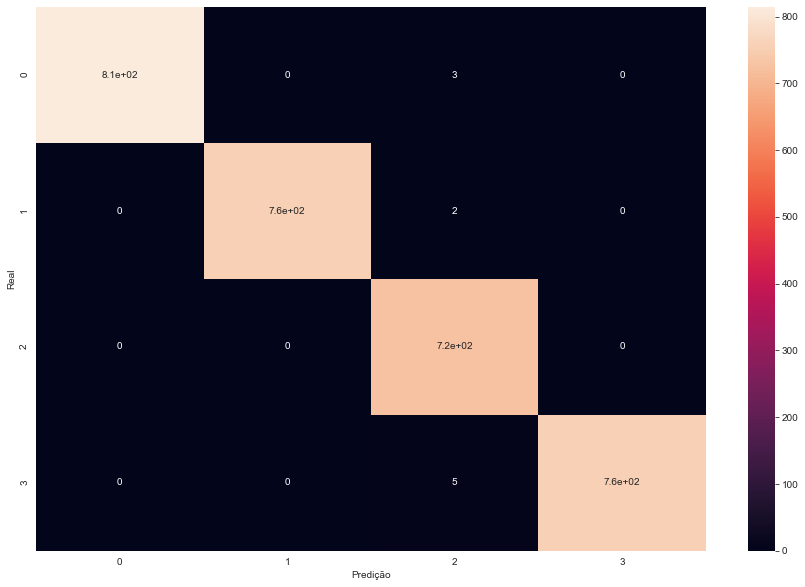

In [24]:
#Plotando a matriz de confusão sendo:
#Eixo vertical o resultado Real,
#Eixo horizontal o que o modelo previu

#  -----------------------------
# |Droga    |Plot Correspondente|
# |---------|-------------------|
# |Maconha  |         3         |
# |Drogas   |         2         |
# |Crack    |         1         |
# |Cocaina  |         0         |
#  -----------------------------

validacao_marcacoes = np.array(df_balanceado['RECLASSIFICAÇÃO'].tolist())
matriz_confusao = confusion_matrix(classe_teste,resultado)
print(matriz_confusao)

plt.figure(figsize = (15,10))
sns.heatmap(matriz_confusao, annot=True).set(xlabel = 'Predição', ylabel='Real')

# Testando com o resto do df

In [25]:
#O modelo foi testado com 3826 dados de cada droga,
#Neste modulo tentaremos testar com o restante do dataframe,
#O DataFrame tratado sem NaN tinha 85579 linhas,
#O DataFrame balanceado tinha  15304 linhas,
#O DataFrame com dados restantes 70275 tem

maconha_restante = maconha.tail(-3826)
crack_restante = crack.tail(-3826)
cocaina_restante = cocaina.tail(-3826)
drogas_restate = drogas.tail(-3826)

In [26]:
cocaina_restante

,Cor Predominante,Descrição,Tipo de Embalagem,RECLASSIFICAÇÃO
CHAVE_OBJETO,,,,
22579530,Branco,"23 porções pequenas de cocaína, sendo duas del...",Porção(es),Cocaína
22579544,Branco,Invólucros plásticos contendo substância semel...,Porção(es),Cocaína
22579604,Branco,oito buchas de susbtância com características...,Porção(es),Cocaína
22579983,Branco,2 bucha de uma substância branca com caracteri...,Unidade(s),Cocaína
22580248,Branco,um pino de po branco semelhante a cocaina,Porção(es),Cocaína
...,...,...,...,...
24126444,Branco,porções embaladas de forma comercial,Porção(es),Cocaína
24126693,Branco,BUCHAS DE SUBSTÂNCIA APARENTANDO COCAINA,Porção(es),Cocaína
24126709,Branco,15 PORÇÕES DE COCAÍNA PESANDO APROXIMADAMENTE 3G,Porção(es),Cocaína


In [27]:
df_com_dados_restantes = pd.concat([maconha_restante,crack_restante,cocaina_restante,drogas_restate])

In [28]:
df_com_dados_restantes

,Cor Predominante,Descrição,Tipo de Embalagem,RECLASSIFICAÇÃO
CHAVE_OBJETO,,,,
21519509,Verde,DUAS PONTAS DE CIGARRO COM CARACTERISTICAS SEM...,Cigarro(s),Maconha
21519594,Verde,UM TIJOLINHO DE SUBSTANCIA SEMELHANTE A MACONHA,Tijolo(s),Maconha
21519604,Verde,UM CIGARRO ARTESANAL COM SUBSTANCIA SEMELHANTE...,Cigarro(s),Maconha
21519631,Verde,UM TIJOLINHO DE SUBSTÂNCIA COM CARACTERÍSTICA ...,Tijolo(s),Maconha
21519670,Verde,uma buchinha de maconha,Porção(es),Maconha
...,...,...,...,...
24126444,Branco,porções embaladas de forma comercial,Porção(es),Cocaína
24126693,Branco,BUCHAS DE SUBSTÂNCIA APARENTANDO COCAINA,Porção(es),Cocaína
24126709,Branco,15 PORÇÕES DE COCAÍNA PESANDO APROXIMADAMENTE 3G,Porção(es),Cocaína


In [29]:
#Criando objetos do tipo sparse, para...
# transformar as palavras em 0's e 1's...
# visando a classificação futura pelo modelo de Machine Learning
# sendo 0 falso, ou seja, a palavra da coluna em questão não está naquela linha do DataFrame
# sendo 1 positivo, ou seja, a palavra da coluna em questão está presente naquela linha do DataFrame

vetoriz_X_tipo_embalagem_restante = CountVectorizer(max_features=1000)
bag_of_words_X_tipo_embalagem_restante = vetoriz_X_tipo_embalagem_restante.fit_transform(df_com_dados_restantes['Tipo de Embalagem'])

vetoriz_X_cor_predominante_restante = CountVectorizer(max_features=1000)
bag_of_words_X_cor_predominante_restante = vetoriz_X_cor_predominante_restante.fit_transform(df_com_dados_restantes['Cor Predominante'])

vetoriz_X_descricao_restante = CountVectorizer(max_features=1000)
bag_of_words_X_descricao_restante = vetoriz_X_descricao_restante.fit_transform(df_com_dados_restantes['Descrição'])

vetoriz_Y_RECLASSIFICACAO_restante = CountVectorizer(max_features=1000)
bag_of_words_Y_RECLASSIFICACAO_restante = vetoriz_Y_RECLASSIFICACAO_restante.fit_transform(df_com_dados_restantes['RECLASSIFICAÇÃO'])

In [30]:
#Criando DataFrames de 0's e 1's..
# a partir dos objetos sparse criados anteriormente
df_sparse_X_tipo_embalagem_restante = pd.DataFrame.sparse.from_spmatrix(bag_of_words_X_tipo_embalagem_restante, columns=vetoriz_X_tipo_embalagem_restante.get_feature_names())
df_sparse_X_cor_predominante_restante = pd.DataFrame.sparse.from_spmatrix(bag_of_words_X_cor_predominante_restante, columns=vetoriz_X_cor_predominante_restante.get_feature_names())
df_sparse_X_descricao_restante = pd.DataFrame.sparse.from_spmatrix(bag_of_words_X_descricao_restante, columns=vetoriz_X_descricao_restante.get_feature_names())
df_sparse_Y_RECLASSIFICACAO_restante = pd.DataFrame.sparse.from_spmatrix(bag_of_words_Y_RECLASSIFICACAO_restante, columns=vetoriz_Y_RECLASSIFICACAO_restante.get_feature_names())

In [31]:
#Concatenando os DataFrames sparse especificos de cada X a ser analisado pelo modelo...
# em um DataFrame com todos eles.
df_sparse_final_dados_restantes = pd.concat([df_sparse_X_tipo_embalagem_restante,df_sparse_X_cor_predominante_restante,df_sparse_X_descricao_restante], axis=1)
df_sparse_final_dados_restantes

caixa  cigarro  comprimido  es  fardo  frasco  galão  garrafa  \
0          0        1           0   0      0       0      0        0   
1          0        0           0   0      0       0      0        0   
2          0        1           0   0      0       0      0        0   
3          0        0           0   0      0       0      0        0   
4          0        0           0   1      0       0      0        0   
...      ...      ...         ...  ..    ...     ...    ...      ...   
70270      0        0           0   1      0       0      0        0   
70271      0        0           0   1      0       0      0        0   
70272      0        0           0   1      0       0      0        0   
70273      0        0           0   1      0       0      0        0   
70274      0        0           0   0      0       0      0        0   

       informar  kit  lata  lote  maço  não  pacote  ponto  porção  saco  \
0             0    0     0     0     0    0       0      0       0     0   
1             0    0     0     0     0    0       0      0       0     0   
2             0    0     0     0     0    0       0      0       0     0   
3             0    0     0     0     0    0       0      0       0     0   
4             0    0     0     0     0    0       0      0       1     0   
...         ...  ...   ...   ...   ...  ...     ...    ...     ...   ...   
70270         0    0     0     0     0    0       0      0       1     0   
70271         0    0     0     0     0    0       0      0       1     0   
70272         0    0     0     0     0    0       0      0       1     0   
70273         0    0     0     0     0    0       0      0       1     0   
70274         0    0     0     0     0    0       0      0       0     0   

       soube  tijolo  unidade  amarelo  azul  bege  branco  cinza  cobreado  \
0          0       0        0        0     0     0       0      0         0   
1          0       1        0        0     0     0       0      0         0   
2          0       0        0        0     0     0       0      0         0   
3          0       1        0        0     0     0       0      0         0   
4          0       0        0        0     0     0       0      0         0   
...      ...     ...      ...      ...   ...   ...     ...    ...       ...   
70270      0       0        0        0     0     0       1      0         0   
70271      0       0        0        0     0     0       1      0         0   
70272      0       0        0        0     0     0       1      0         0   
70273      0       0        0        0     0     0       1      0         0   
70274      0       0        1        0     0     0       1      0         0   

       dourado  incolor  laranja  lilás  marrom  prateado  preto  rosa  roxo  \
0            0        0        0      0       0         0      0     0     0   
1            0        0        0      0       0         0      0     0     0   
2            0        0        0      0       0         0      0     0     0   
3            0        0        0      0       0         0      0     0     0   
4            0        0        0      0       0         0      0     0     0   
...        ...      ...      ...    ...     ...       ...    ...   ...   ...   
70270        0        0        0      0       0         0      0     0     0   
70271        0        0        0      0       0         0      0     0     0   
70272        0        0        0      0       0         0      0     0     0   
70273        0        0        0      0       0         0      0     0     0   
70274        0        0        0      0       0         0      0     0     0   

       salmon  verde  vermelho  00  00g  00gramas  01  01g  02  02g  03  04  \
0           0      1         0   0    0         0   0    0   0    0   0   0   
1           0      1         0   0    0         0   0    0   0    0   0   0   
2           0      1         0   0    0         0   0    0   0    0   0   0   
3  

In [33]:
#Mostrando na tela que os dados X e Y tem as mesmas linhas a serem analisadas
print(len(np.array(df_sparse_final_dados_restantes)),len(np.array(df_com_dados_restantes['RECLASSIFICAÇÃO'].tolist())))

70275 70275


In [34]:
#Definindo os dados de teste, pois não iremos treinar o modelo...
# usaremos o mesmo modelo anteriormente treinado e com acurácia de 99%
treino__dados_restantes, teste_dados_restantes, classe_treino_dados_restantes, classe_teste_dados_restantes = train_test_split((np.array(df_sparse_final_dados_restantes)), np.array(df_com_dados_restantes['RECLASSIFICAÇÃO'].tolist()),test_size=0.2,random_state=42)

#Testando o modelo anterior nos dados restantes
resultado_dados_restantes = regressao_logistica.predict(teste_dados_restantes)
acuracia_dados_restantes = regressao_logistica.score(teste_dados_restantes, classe_teste_dados_restantes)
acuracia_dados_restantes

0.008537886872998933

[[  93  540 3084    1]
 [  82   24 2474    0]
 [   0    0    0    0]
 [ 208   53 7493    3]]


[Text(0.5, 70.0, 'Predição'), Text(115.0, 0.5, 'Real')]

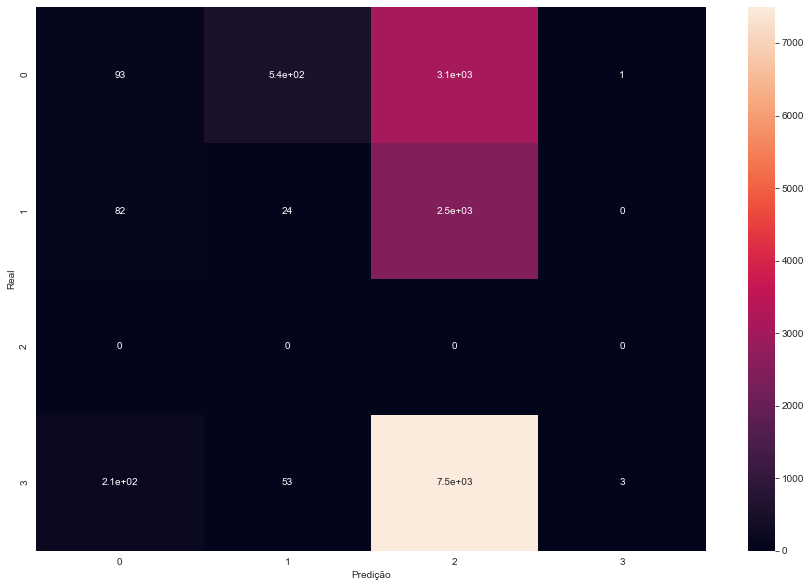

In [35]:
validacao_marcacoes = np.array(df_com_dados_restantes['RECLASSIFICAÇÃO'].tolist())
matriz_confusao = confusion_matrix(classe_teste_dados_restantes,resultado_dados_restantes)
print(matriz_confusao)

plt.figure(figsize = (15,10))
sns.heatmap(matriz_confusao, annot=True).set(xlabel = 'Predição', ylabel='Real')
#Maconha = 3
#Drogas = 2
#Crack = 1
#Cocaina = 0

# Analisando erros do modelo

In [47]:
#Criando um DataFrame a partir do teste para ver o que e porque o modelo errou
df_analise_dos_erros = pd.DataFrame(teste_dados_restantes)
#Criando a coluna o que realmente era o dado
df_analise_dos_erros['REAL'] = classe_teste_dados_restantes
#Criando a coluna o que modelo preveu
df_analise_dos_erros['PREVISTO'] = resultado_dados_restantes

#Mostrando quantos erros o modelo teve
df_analise_dos_erros.loc[df_analise_dos_erros['REAL'] != df_analise_dos_erros['PREVISTO']].shape[0]

13935

In [49]:
#Criando uma lista com os nomes das colunas do DataFrame...
# "df_sparse_final_dados_restantes"que o modelo foi testado...
#  Para que possamos ter uma ideia do que foi errado
columns_name = list(df_sparse_final_dados_restantes.columns)

In [50]:
#Alterando o nome das colunas no df_analise_dos_erros
for i in range(0, len(columns_name)):
    k=0
    df_analise_dos_erros.rename(columns={i: columns_name[i]}, inplace=True)
    k+=1

In [51]:
df_analise_dos_erros

caixa  cigarro  comprimido  es  fardo  frasco  galão  garrafa  \
0          0        0           0   1      0       0      0        0   
1          0        0           0   1      0       0      0        0   
2          0        0           0   0      0       0      0        0   
3          0        0           0   1      0       0      0        0   
4          0        0           0   1      0       0      0        0   
...      ...      ...         ...  ..    ...     ...    ...      ...   
14050      0        0           0   1      0       0      0        0   
14051      0        0           0   0      0       0      0        0   
14052      0        0           0   1      0       0      0        0   
14053      0        0           0   1      0       0      0        0   
14054      0        1           0   0      0       0      0        0   

       informar  kit  lata  lote  maço  não  pacote  ponto  porção  saco  \
0             0    0     0     0     0    0       0      0       1     0   
1             0    0     0     0     0    0       0      0       1     0   
2             0    0     0     0     0    0       0      0       0     0   
3             0    0     0     0     0    0       0      0       1     0   
4             0    0     0     0     0    0       0      0       1     0   
...         ...  ...   ...   ...   ...  ...     ...    ...     ...   ...   
14050         0    0     0     0     0    0       0      0       1     0   
14051         0    0     0     0     0    0       0      0       0     0   
14052         0    0     0     0     0    0       0      0       1     0   
14053         0    0     0     0     0    0       0      0       1     0   
14054         0    0     0     0     0    0       0      0       0     0   

       soube  tijolo  unidade  amarelo  azul  bege  branco  cinza  cobreado  \
0          0       0        0        0     0     0       0      0         0   
1          0       0        0        0     0     0       0      0         0   
2          0       1        0        0     0     0       0      0         0   
3          0       0        0        0     0     0       0      0         0   
4          0       0        0        0     0     0       0      0         0   
...      ...     ...      ...      ...   ...   ...     ...    ...       ...   
14050      0       0        0        0     0     0       1      0         0   
14051      0       1        0        0     0     0       0      0         0   
14052      0       0        0        0     0     0       1      0         0   
14053      0       0        0        0     0     0       0      0         0   
14054      0       0        0        0     0     0       1      0         0   

       dourado  incolor  laranja  lilás  marrom  prateado  preto  rosa  roxo  \
0            0        0        0      0       1         0      0     0     0   
1            0        0        0      0       0         0      0     0     0   
2            0        0        0      0       1         0      0     0     0   
3            0        0        0      0       0         0      0     0     0   
4            0        0        0      0       0         0      0     0     0   
...        ...      ...      ...    ...     ...       ...    ...   ...   ...   
14050        0        0        0      0       0         0      0     0     0   
14051        0        0        0      0       0         0      0     0     0   
14052        0        0        0      0       0         0      0     0     0   
14053        0        0        0      0       0         0      0     0     0   
14054        0        0        0      0       0         0      0     0     0   

       salmon  verde  vermelho  00  00g  00gramas  01  01g  02  02g  03  04  \
0           0      0         0   0    0         0   0    0   0    0   0   0   
1           0      1         0   0    0         0   0    0   0    0   0   0   
2           0      0         0   0    0         0   0    0   0    0   0   0   
3  

In [77]:
columns_names = {}
if df_analise_dos_erros.loc[0]({coluna : numero})
    columns_names.update()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [63]:
columns_names = []
for i in range(0, df_analise_dos_erros.shape[0]):
    for line in df_analise_dos_erros.loc[i]:
        if line == 1:
            columns_names.append(line.index)

AttributeError: 'numpy.int64' object has no attribute 'index'